## MNIST 데이터셋 RandomForest로 분류하기

#### 라이브러리 및 패키지 불러오기

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import random

#### 데이터 로드 및 전처리

In [2]:
# 데이터 로드
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 원본 데이터 시각화

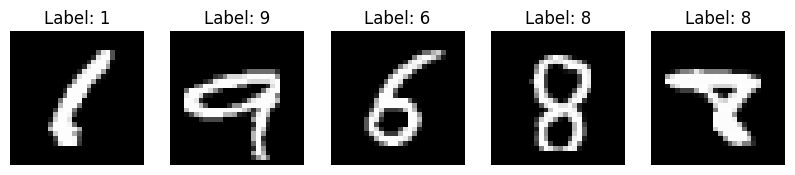

In [3]:
# 원본 데이터 시각화
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax in axes:
    idx = random.randint(0, len(X))
    ax.imshow(X.iloc[idx].values.reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y[idx]}')
    ax.axis('off')
plt.show()

#### 모델 적용

In [4]:
# RandomForest 모델 학습
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# 모델 예측
y_pred = rfc.predict(X_test)

# 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2026    0    6    0    2    1    5    3   14    1]
 [   0 2329   12   10    3    2    0    7    1    0]
 [   9    7 2062    7    8    0   10   15   12    3]
 [   3    0   32 2064    2   16    1   22   21   15]
 [   3    3    3    2 1881    1    2    6    2   33]
 [   4    3    1   26    4 1839   15    4   13    6]
 [   3    3    0    1    9   10 2057    0    5    0]
 [   4    8   26    3    9    1    0 2166    4   27]
 [   2   11   10   22    7   17    6    7 1894   16]
 [  14    9    3   22   24    5    2   17   10 1984]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2058
           1       0.98      0.99      0.98      2364
           2       0.96      0.97      0.96      2133
           3       0.96      0.95      0.95      2176
           4       0.97      0.97      0.97      1936
           5       0.97      0.96      0.97      1915
           6       0.98      0.99      0.98      2088
           7       0.96      0.96   

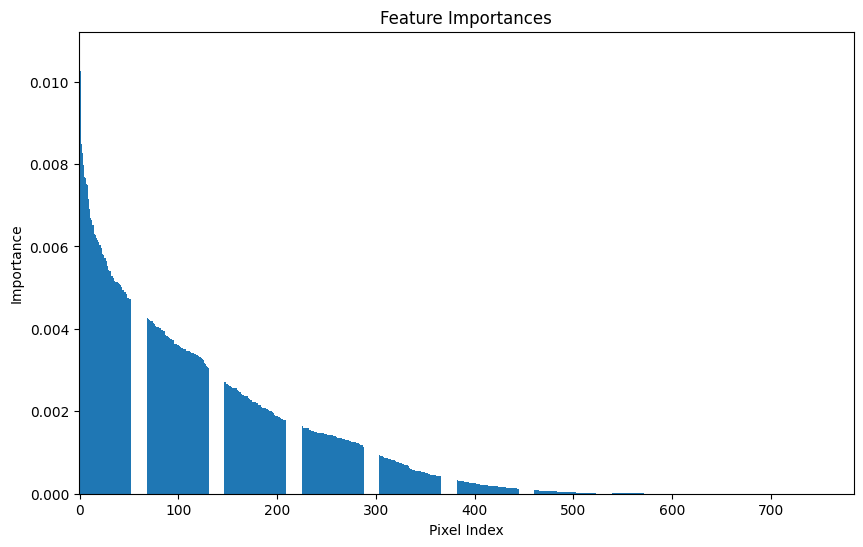

In [5]:
# Feature 중요도 시각화
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Pixel Index')
plt.ylabel('Importance')
plt.show()

#### 모델 평가

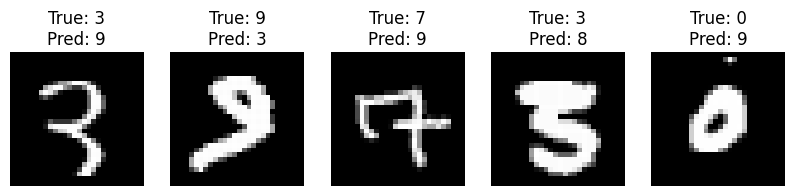

In [6]:
# 모델 평가 데이터 시각화 (잘못 분류된 예시)
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
misclassified_indices = np.where(y_test != y_pred)[0]

for ax in axes:
    idx = random.choice(misclassified_indices)
    ax.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {y_test.values[idx]}\nPred: {y_pred[idx]}')
    ax.axis('off')
plt.show()

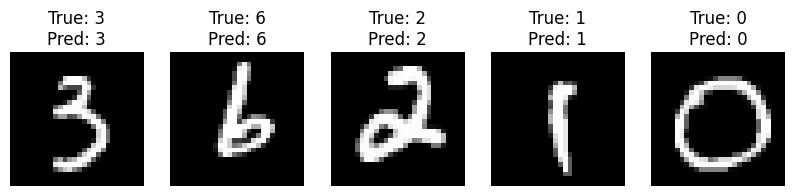

In [7]:
# 모델 평가 데이터 시각화 (올바르게 분류된 예시)
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
correctly_classified_indices = np.where(y_test == y_pred)[0]

for ax in axes:
    idx = random.choice(correctly_classified_indices)
    ax.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {y_test.values[idx]}\nPred: {y_pred[idx]}')
    ax.axis('off')
plt.show()